In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline


In [11]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

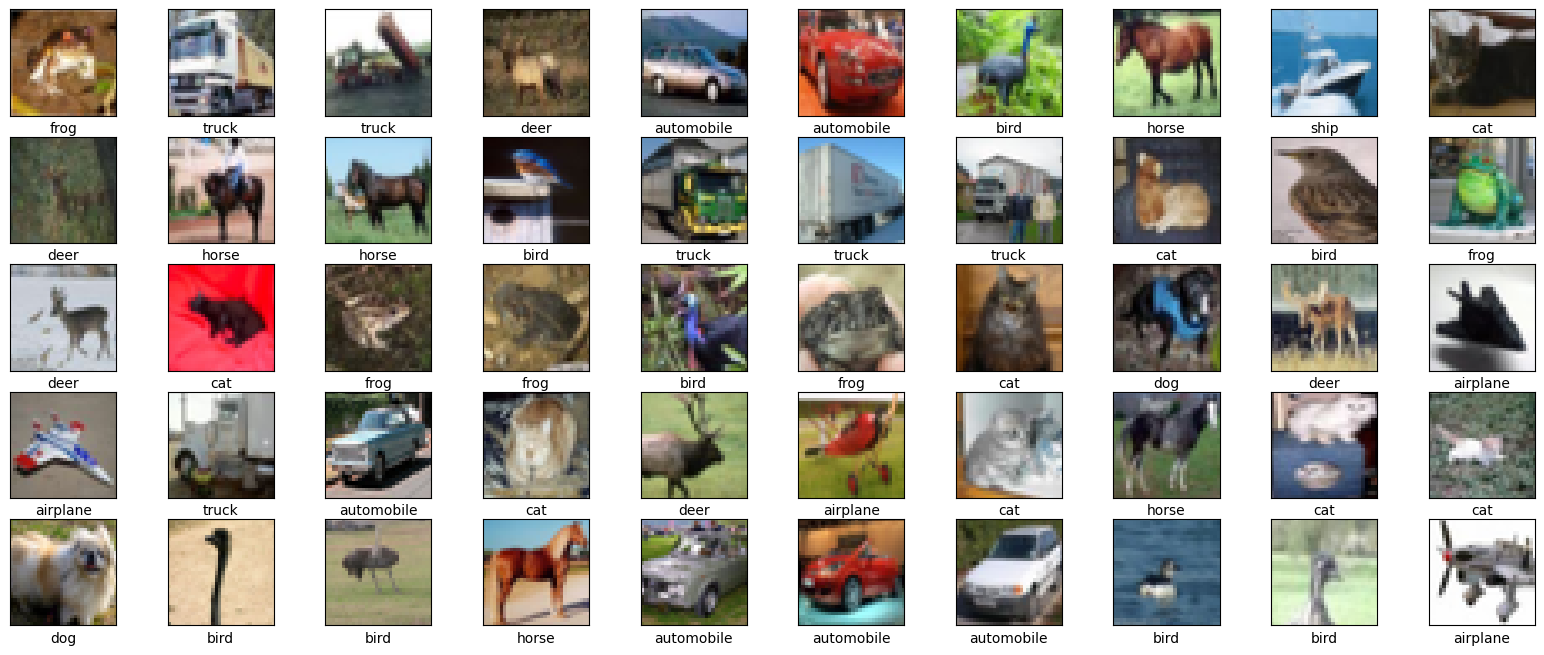

In [8]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [12]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
     layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32, 32, 64)        256       
                                                                 
 dense_9 (Dense)             (None, 32, 32, 32)        2080      
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

# Using Optimizer "ADAM"

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 69s 55ms/step - loss: 1.5613 - accuracy: 0.4286 - val_loss: 1.3920 - val_accuracy: 0.4928
Epoch 2/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.2891 - accuracy: 0.5368 - val_loss: 1.2066 - val_accuracy: 0.5677
Epoch 3/10
1250/1250 [==============================] - 69s 55ms/step - loss: 1.1447 - accuracy: 0.5959 - val_loss: 1.1061 - val_accuracy: 0.6108
Epoch 4/10
1250/1250 [==============================] - 66s 52ms/step - loss: 1.0442 - accuracy: 0.6313 - val_loss: 1.0626 - val_accuracy: 0.6259
Epoch 5/10
1250/1250 [==============================] - 72s 57ms/step - loss: 0.9686 - accuracy: 0.6570 - val_loss: 1.0772 - val_accuracy: 0.6306
Epoch 6/10
1250/1250 [==============================] - 68s 55ms/step - loss: 0.9097 - accuracy: 0.6777 - val_loss: 1.0018 - val_accuracy: 0.6498
Epoch 7/10
1250/1250 [==============================] - 68s 54ms/step - loss: 0.8591 - accuracy: 0.6962 - val_loss: 0.9932 -

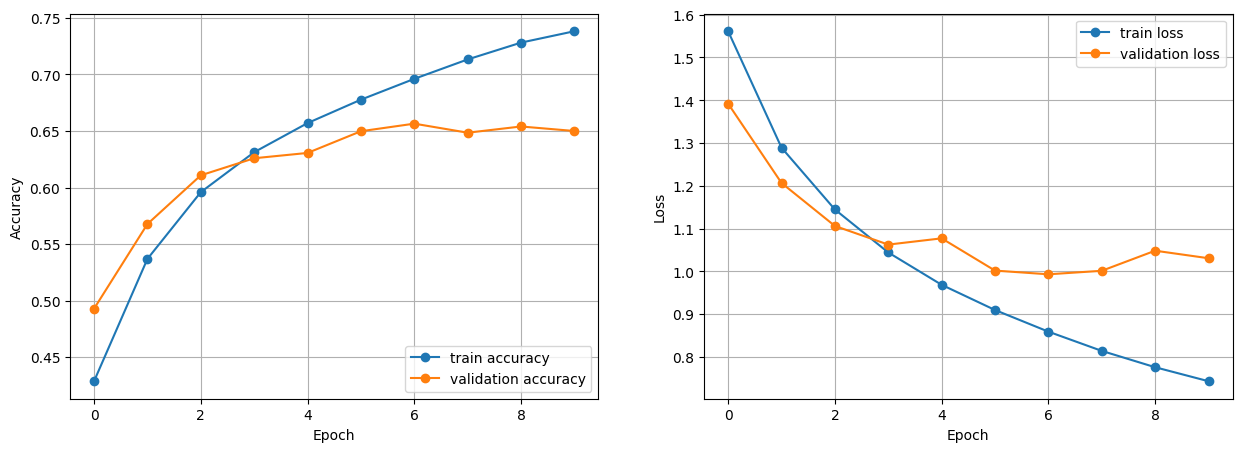

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [14]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 16s 51ms/step - loss: 1.0357 - accuracy: 0.6452

Test Accuracy: 0.6452000141143799

Test Loss: 1.035709023475647


# Using Optimizer "RMSPROP"

In [9]:
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
625/625 [==============================] - 276s 440ms/step - loss: 1.9277 - accuracy: 0.2849 - val_loss: 1.5780 - val_accuracy: 0.4248
Epoch 2/10
625/625 [==============================] - 288s 461ms/step - loss: 1.6247 - accuracy: 0.4082 - val_loss: 1.4304 - val_accuracy: 0.4845
Epoch 3/10
625/625 [==============================] - 287s 460ms/step - loss: 1.4664 - accuracy: 0.4730 - val_loss: 1.3640 - val_accuracy: 0.5051
Epoch 4/10
625/625 [==============================] - 293s 468ms/step - loss: 1.3466 - accuracy: 0.5208 - val_loss: 1.2151 - val_accuracy: 0.5693
Epoch 5/10
625/625 [==============================] - 289s 461ms/step - loss: 1.2476 - accuracy: 0.5634 - val_loss: 1.1720 - val_accuracy: 0.5865
Epoch 6/10
625/625 [==============================] - 293s 469ms/step - loss: 1.1621 - accuracy: 0.5940 - val_loss: 1.1095 - val_accuracy: 0.6095
Epoch 7/10
625/625 [==============================] - 288s 462ms/step - loss: 1.0980 - accuracy: 0.6180 - val_loss: 1.1175 -

In [15]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 15s 49ms/step - loss: 1.0357 - accuracy: 0.6452

Test Accuracy: 0.6452000141143799

Test Loss: 1.035709023475647


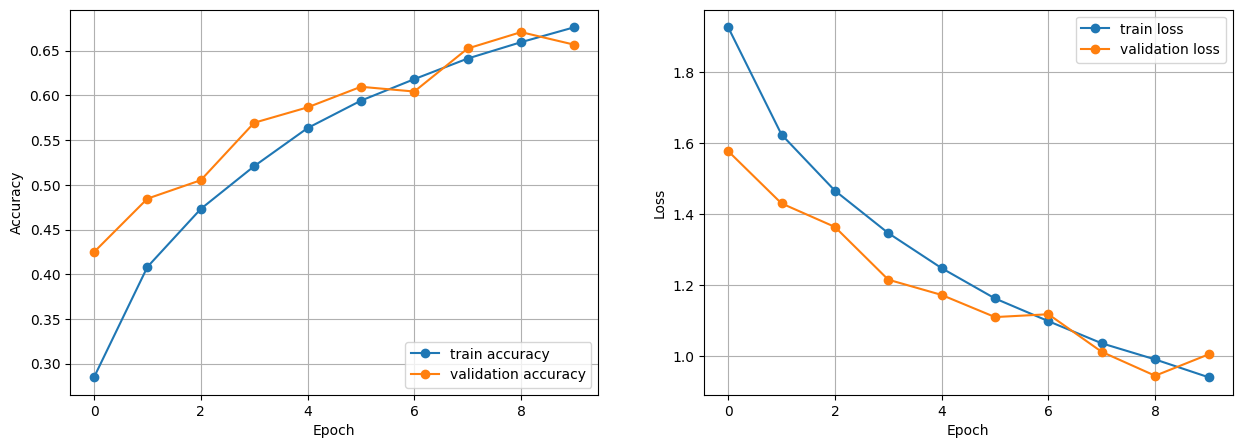

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Using Optimizer "SGD"

In [23]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 7s 10ms/step - loss: 2.0251 - accuracy: 0.2467 - val_loss: 1.9618 - val_accuracy: 0.2915
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 2.0068 - accuracy: 0.2567 - val_loss: 1.9487 - val_accuracy: 0.3018
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 1.9962 - accuracy: 0.2584 - val_loss: 1.9325 - val_accuracy: 0.3086
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 1.9797 - accuracy: 0.2641 - val_loss: 1.9154 - val_accuracy: 0.3137
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 1.9616 - accuracy: 0.2743 - val_loss: 1.9028 - val_accuracy: 0.3167
Epoch 6/20
625/625 [==============================] - 5s 9ms/step - loss: 1.9516 - accuracy: 0.2771 - val_loss: 1.8744 - val_accuracy: 0.3253
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 1.9326 - accuracy: 0.2867 - val_loss: 1.8545 - val_accuracy: 0.3363
Epoc

In [25]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 1.6369 - accuracy: 0.4148

Test Accuracy: 0.4147999882698059

Test Loss: 1.6368740797042847


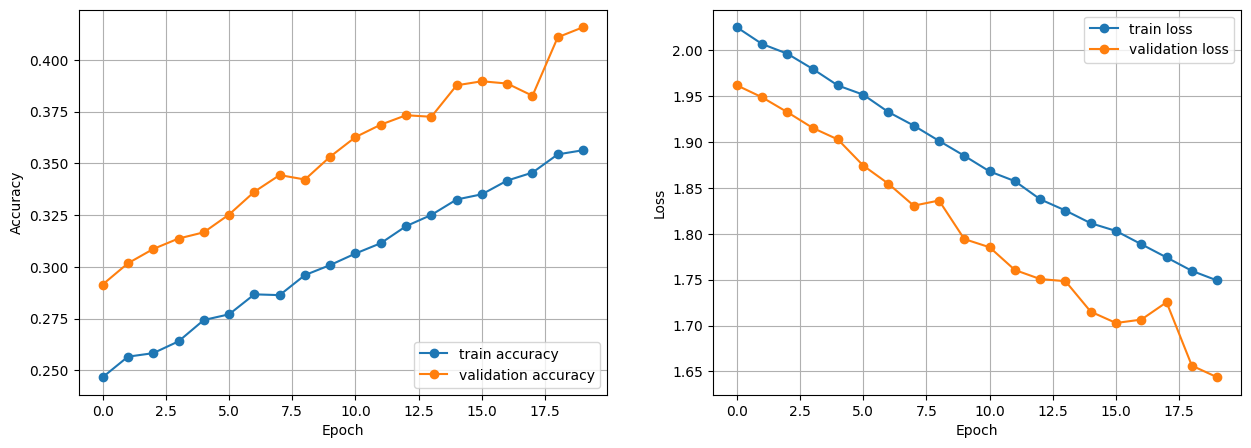

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**Discussion:**
Based on the accuracy results, the Adam optimizer achieved the highest accuracy of 74%, outperforming both SGD (64%) and RMSprop (41%). This indicates that Adam was more effective in finding better weight updates during training and led to a more accurate model.